In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string

In [3]:
tweets_df = pd.read_csv('/Users/arjunkhanchandani/Desktop/twitter_data_analysis/v2/data/tweets_cleaned_v2.csv')
print(tweets_df.shape)
tweets_df.head()

(18111, 5)


,tweet_id,tweet,city,year,hashtags
0,0,bad thing say government medical spare operati...,Mumbai,2022,[]
1,1,net family admitted government hospital privat...,Mumbai,2022,[]
2,2,vandi one hotspot measles well respiratory dis...,Mumbai,2022,['#Measles']
3,3,till medical negligence exist government hospi...,Mumbai,2022,[]
4,4,doctor reading also government hospital resident,Mumbai,2022,[]


In [4]:
tweets_df_uncleaned = pd.read_csv('/Users/arjunkhanchandani/Desktop/twitter_data_analysis/v2/data/tweets_v2.csv')
print(tweets_df_uncleaned.shape)
tweets_df_uncleaned.head()

(26015, 4)


,Unnamed: 0,date_created,tweet,city
0,0,2022-12-12 16:13:45+00:00,@esichq @byadavbjp @Rameswar_Teli @mygovindia ...,Mumbai
1,1,2022-12-10 06:30:56+00:00,@PotholeWarriors @CMOMaharashtra @mieknathshin...,Mumbai
2,2,2022-11-23 13:09:18+00:00,@Iam_Ayushmann Govandi is one of the Hotspot o...,Mumbai
3,3,2022-10-27 15:58:11+00:00,Till when medical negligence will exist in gov...,Mumbai
4,4,2022-07-28 03:03:15+00:00,Me being a doctor reading this\nAlso governmen...,Mumbai


In [5]:
#selecting only year from date_created column
tweets_df_uncleaned['date_created'] = pd.to_datetime(tweets_df_uncleaned['date_created'])
tweets_df_uncleaned['year'] = tweets_df_uncleaned['date_created'].dt.year
tweets_df_uncleaned.drop(['date_created'], axis=1, inplace=True)
tweets_df_uncleaned.head()

,Unnamed: 0,tweet,city,year
0,0,@esichq @byadavbjp @Rameswar_Teli @mygovindia ...,Mumbai,2022
1,1,@PotholeWarriors @CMOMaharashtra @mieknathshin...,Mumbai,2022
2,2,@Iam_Ayushmann Govandi is one of the Hotspot o...,Mumbai,2022
3,3,Till when medical negligence will exist in gov...,Mumbai,2022
4,4,Me being a doctor reading this\nAlso governmen...,Mumbai,2022


In [6]:
print('Tweets by City\n')
print(tweets_df['city'].value_counts())

print('Tweets by Year\n')
print(tweets_df['year'].value_counts())

Tweets by City

Delhi        6896
Mumbai       4622
Hyderabad    2420
Bangalore    2337
Kolkata      1024
Chennai       812
Name: city, dtype: int64
Tweets by Year

2020    6053
2021    5068
2019    2625
2022    2357
2018    2008
Name: year, dtype: int64


# Pre Sentiment Analysis

In [7]:
wc = WordCloud(stopwords=['acronym', 'hospital', 'terminal', 'rich', 'environment', 'government', 'doctor', 'understand', 'mean', 'patient'], min_word_length=5, background_color='white', colormap="Dark2", max_words=1000, width=800, height=400, random_state=42)

Bangalore
Chennai
Delhi
Hyderabad
Kolkata
Mumbai


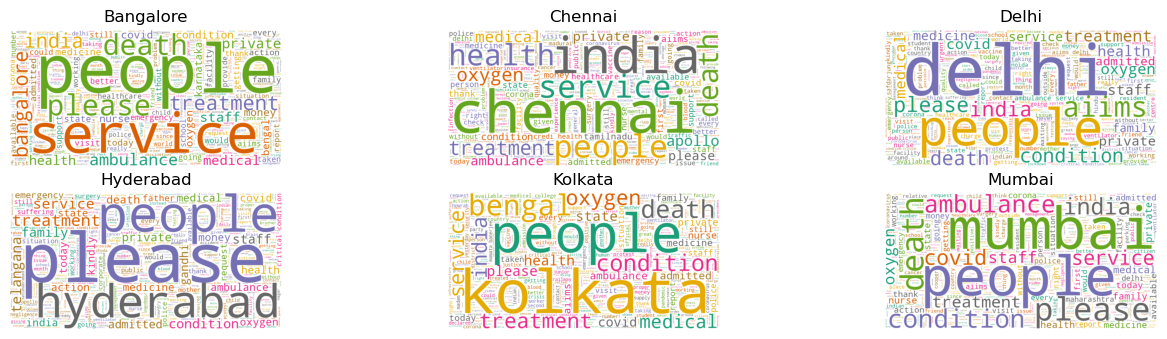

In [8]:
text = tweets_df.groupby('city')['tweet'].apply(lambda x:x.str.cat(sep=" "))
cities = ['Bangalore', 'Chennai', 'Delhi',  'Hyderabad', 'Kolkata', 'Mumbai']


text = text.to_frame()
text.index = cities

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 6]


for index, city in enumerate(text.index):
    print(city)
    wc.generate(text.tweet[city])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(cities[index])
    
plt.show()                                     

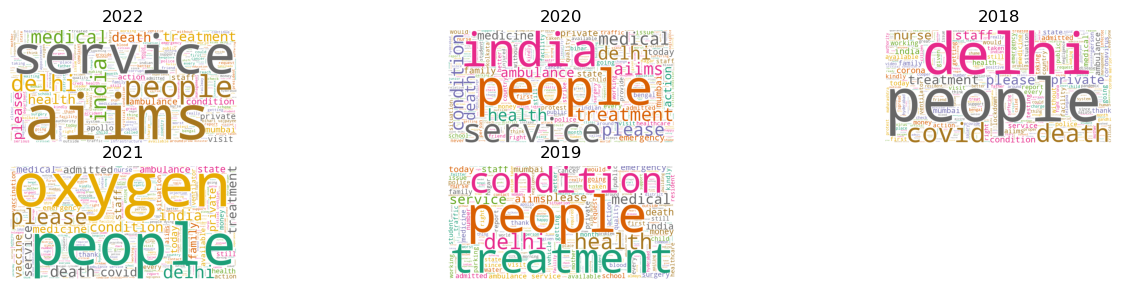

In [9]:
text = tweets_df.groupby('year')['tweet'].apply(lambda x:x.str.cat(sep=" "))
# years = ['2018', '2019', '2020', '2021', '2022']
years = ['2022', '2020', '2018', '2021', '2019']

text = text.to_frame()
text.index = years

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 5]

for index, year in enumerate(text.index):
    wc.generate(text.tweet[year])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(years[index])
    
plt.show()                                     

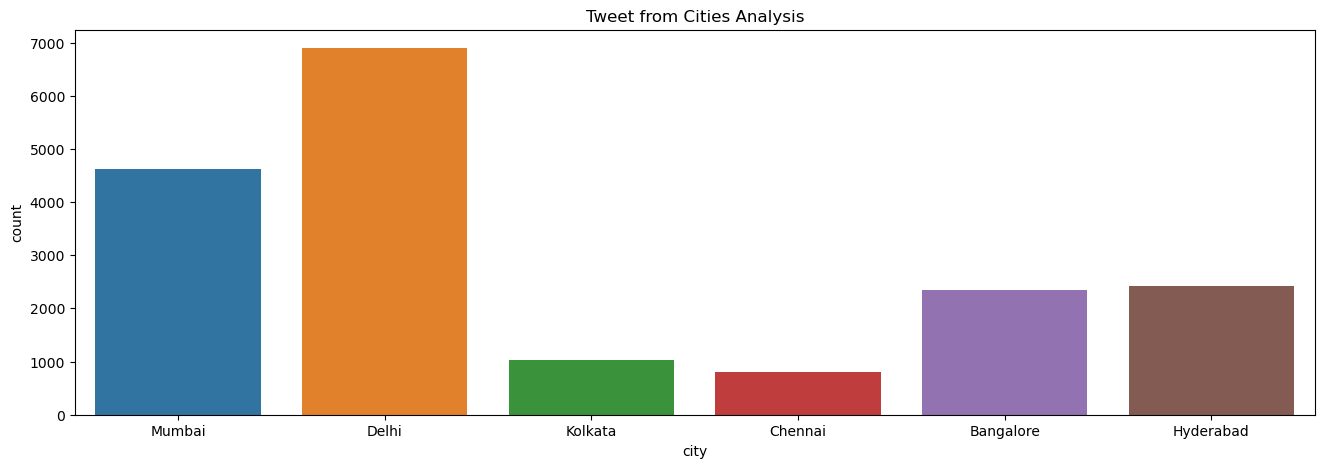

In [10]:
sns.countplot(x='city', data=tweets_df)
plt.title('Tweet from Cities Analysis')

plt.show()

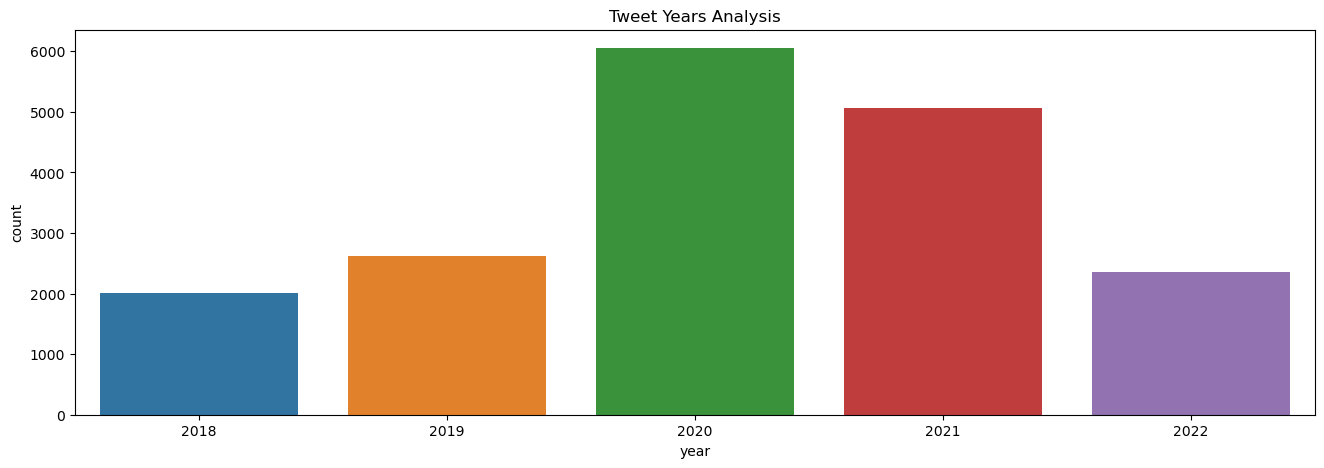

In [11]:
sns.countplot(x='year', data=tweets_df)
plt.title('Tweet Years Analysis')

plt.show()

In [12]:
#char length of tweets
tweets_df['tweet_length'] = tweets_df['tweet'].apply(lambda x: len(str(x)))
tweets_df['tweet_length']

0        166
1        136
2        208
3        157
4         48
        ... 
18106    176
18107    126
18108    157
18109    175
18110     68
Name: tweet_length, Length: 18111, dtype: int64

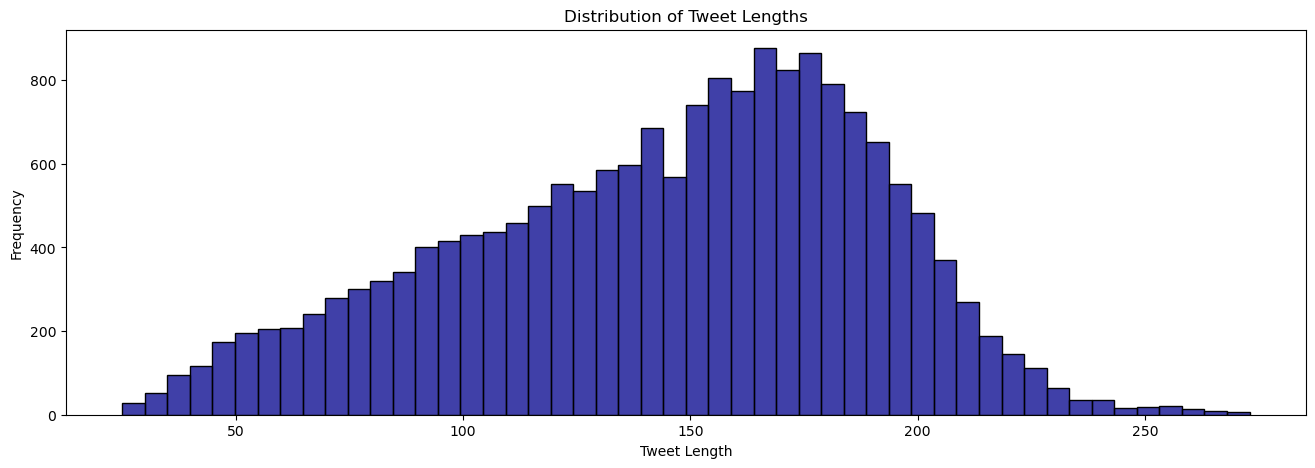

In [16]:
sns.histplot(tweets_df['tweet_length'], bins=50, color='darkblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

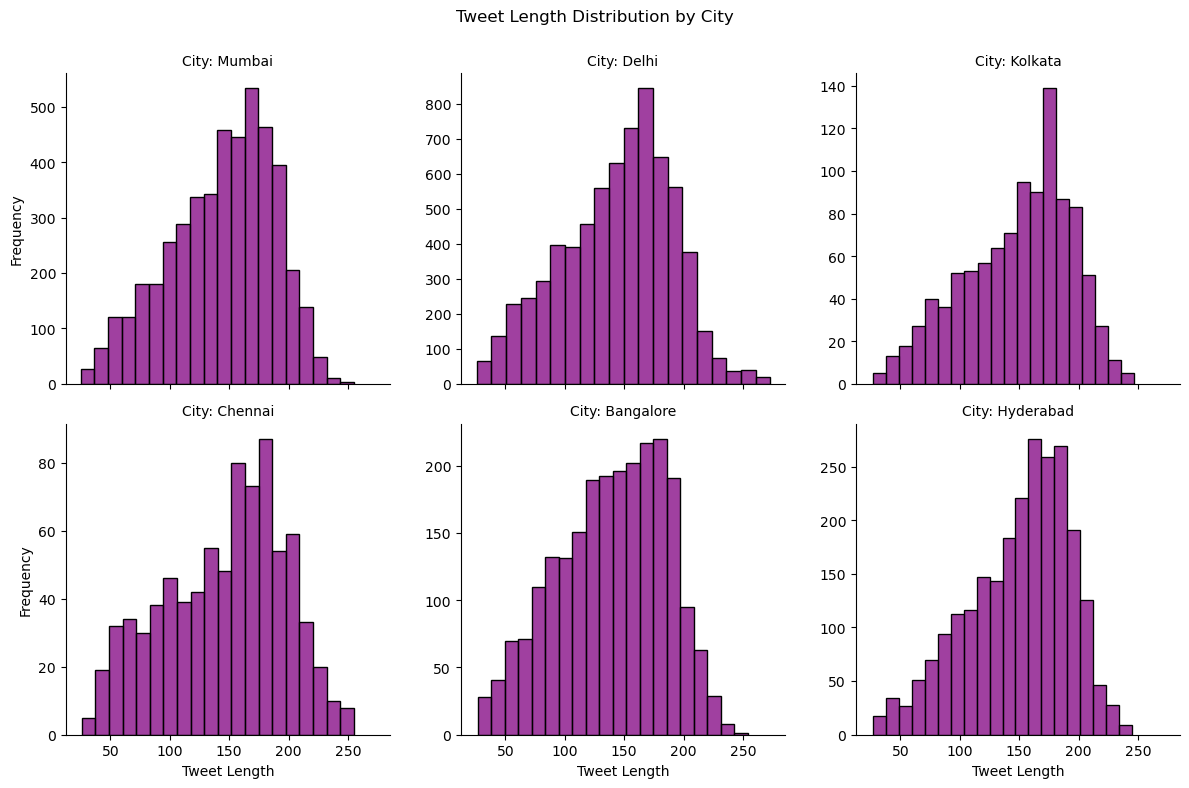

In [17]:
g = sns.FacetGrid(tweets_df, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'tweet_length', bins=20, color='purple')

g.set_axis_labels('Tweet Length', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Tweet Length Distribution by City')

plt.show()

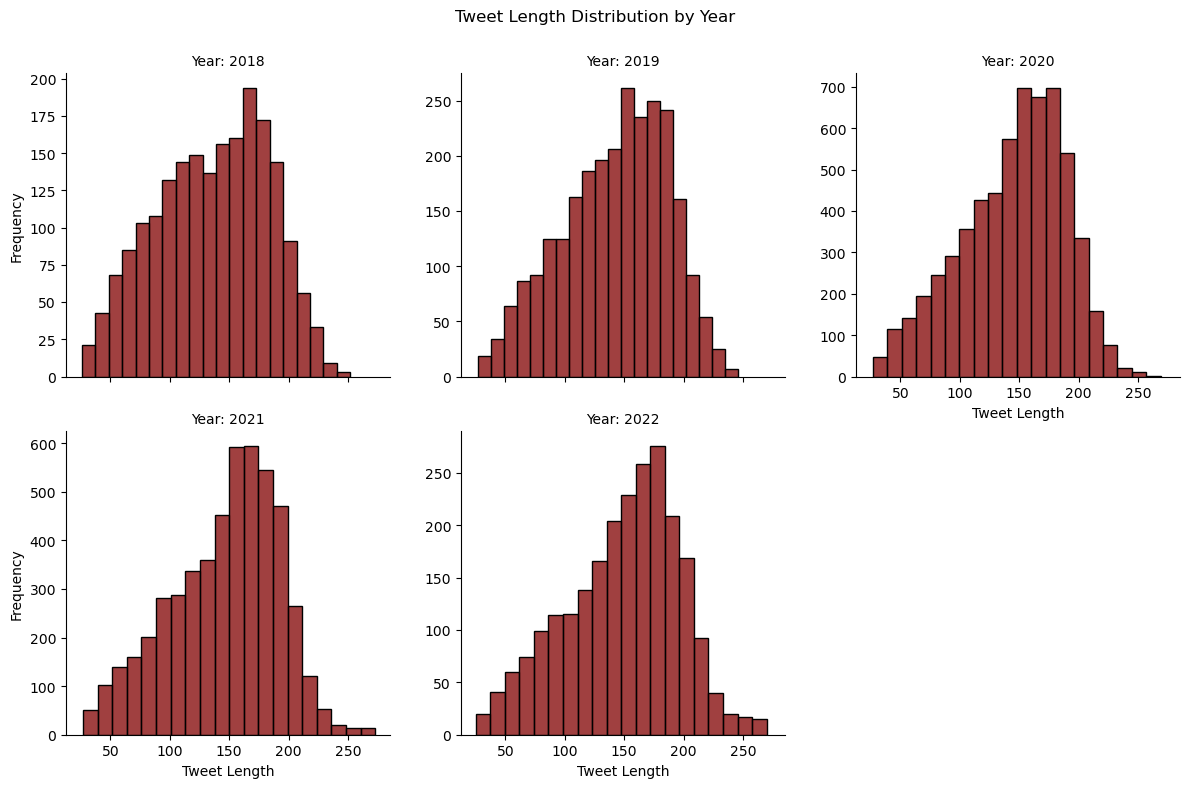

In [18]:
g = sns.FacetGrid(tweets_df, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'tweet_length', bins=20, color='maroon')

g.set_axis_labels('Tweet Length', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Tweet Length Distribution by Year')

plt.show()

In [19]:
#word counts
tweets_df['word_count'] = tweets_df['tweet'].apply(lambda x: len(str(x).split()))
tweets_df['word_count']

0        24
1        20
2        27
3        23
4         6
         ..
18106    24
18107    17
18108    24
18109    22
18110    12
Name: word_count, Length: 18111, dtype: int64

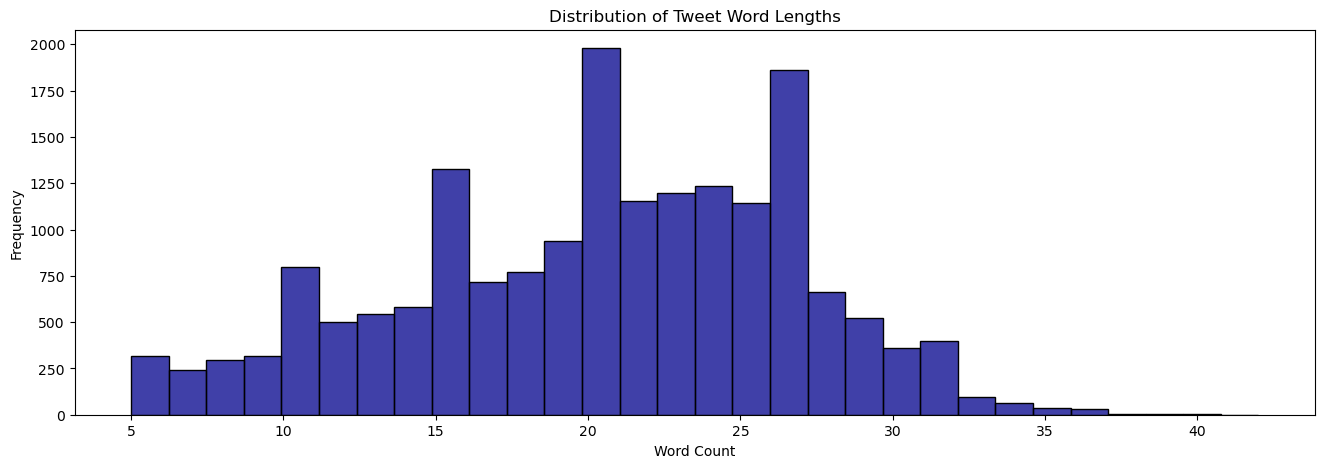

In [20]:
sns.histplot(tweets_df['word_count'], bins=30, color='darkblue')
plt.title('Distribution of Tweet Word Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


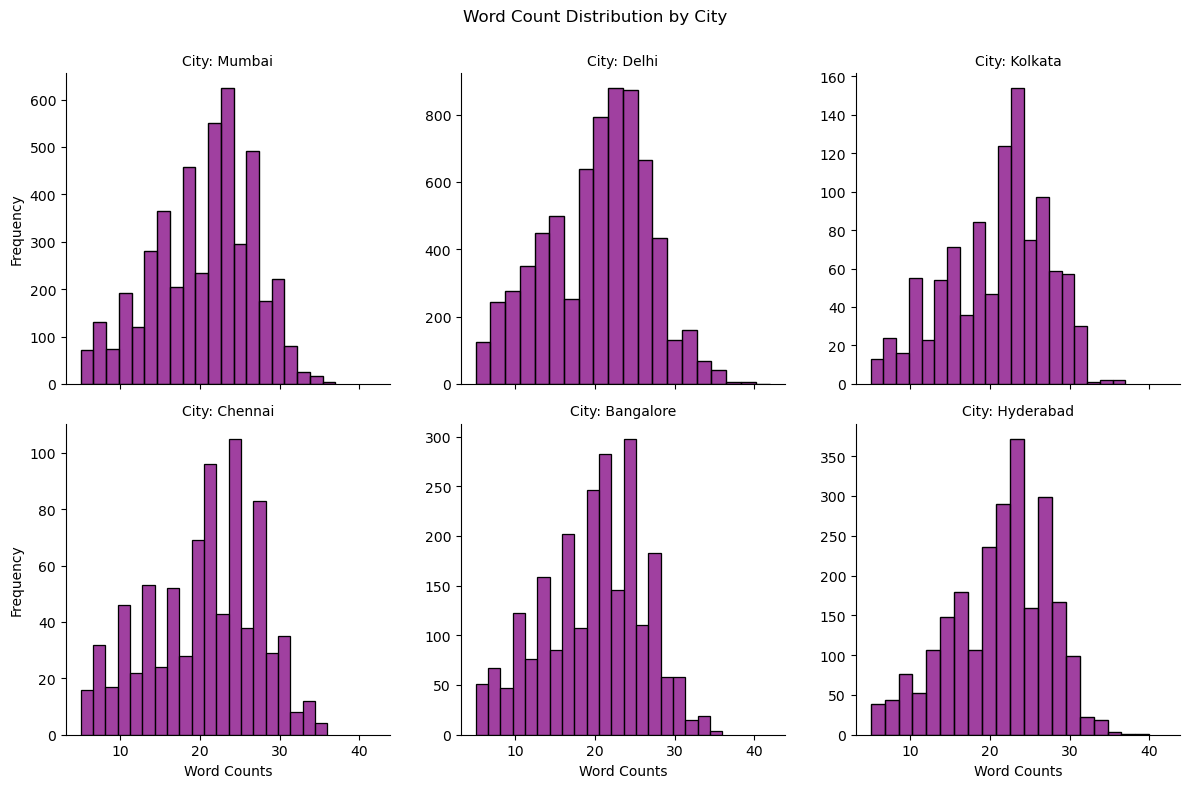

In [21]:
g = sns.FacetGrid(tweets_df, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'word_count', bins=20, color='purple')

g.set_axis_labels('Word Counts', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Word Count Distribution by City')

plt.show()

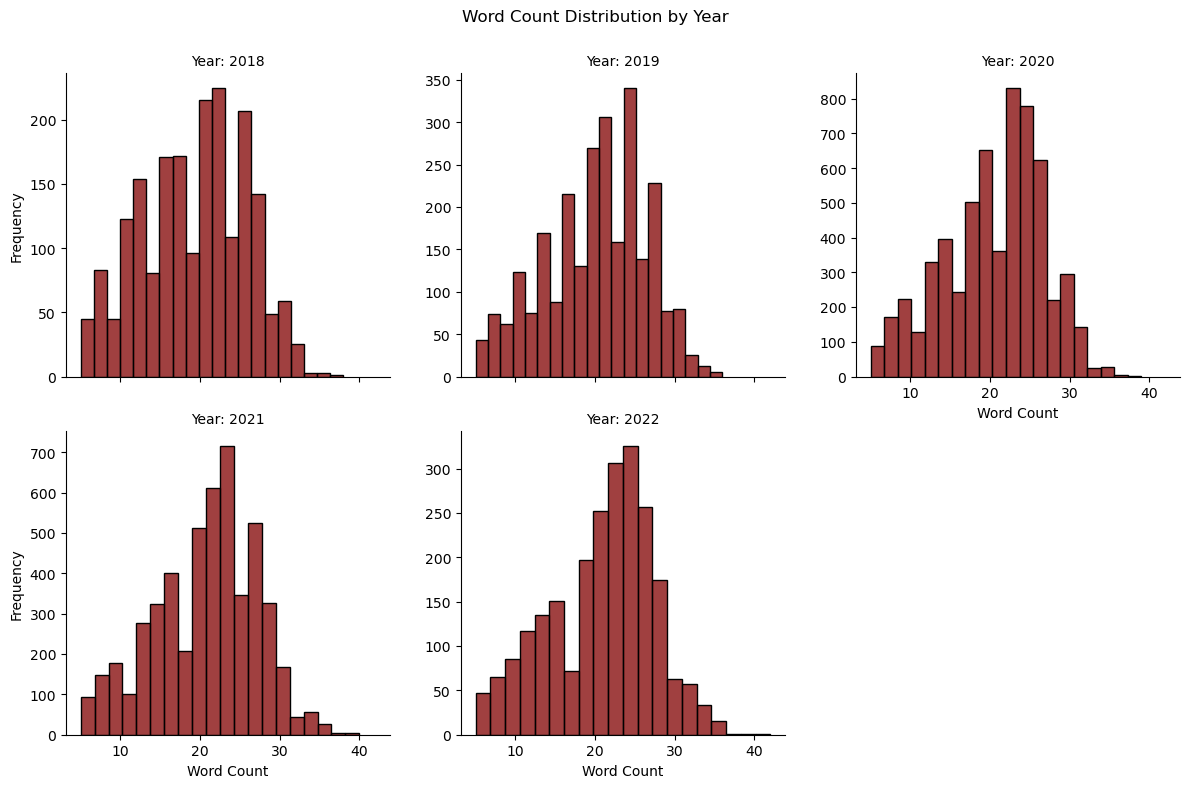

In [22]:
g = sns.FacetGrid(tweets_df, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'word_count', bins=20, color='maroon')

g.set_axis_labels('Word Count', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Word Count Distribution by Year')

plt.show()

In [23]:
# total unique word count
tweets_df['unique_word_count'] = tweets_df['tweet'].apply(lambda x: len(set(str(x).split())))

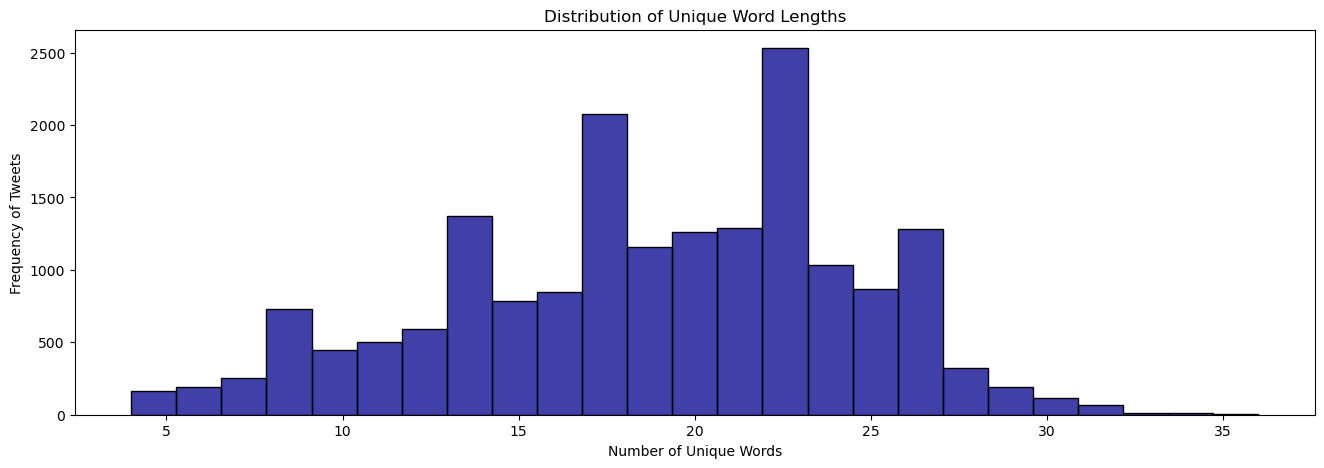

In [26]:
sns.histplot(tweets_df['unique_word_count'], bins=25, color='darkblue')
plt.title('Distribution of Unique Word Lengths')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency of Tweets')
plt.show()

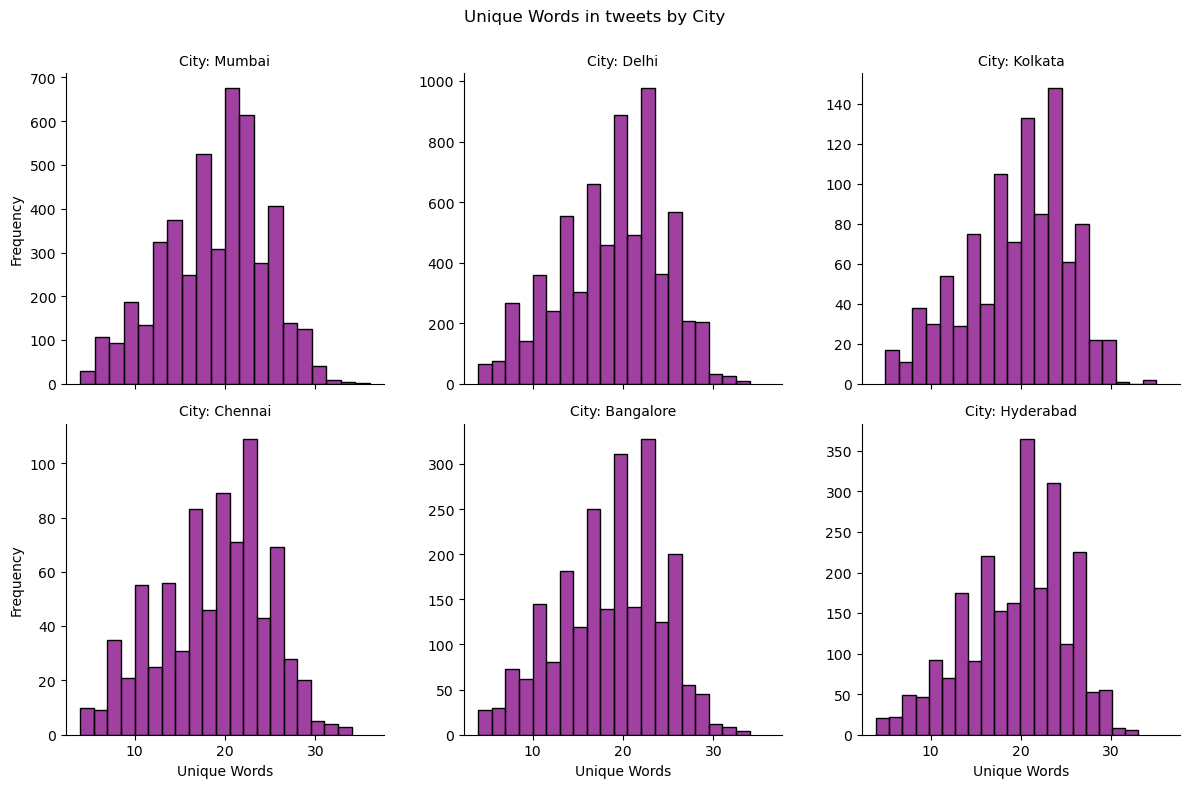

In [27]:
g = sns.FacetGrid(tweets_df, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'unique_word_count', bins=20, color='purple')

g.set_axis_labels('Unique Words', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Unique Words in tweets by City')

plt.show()

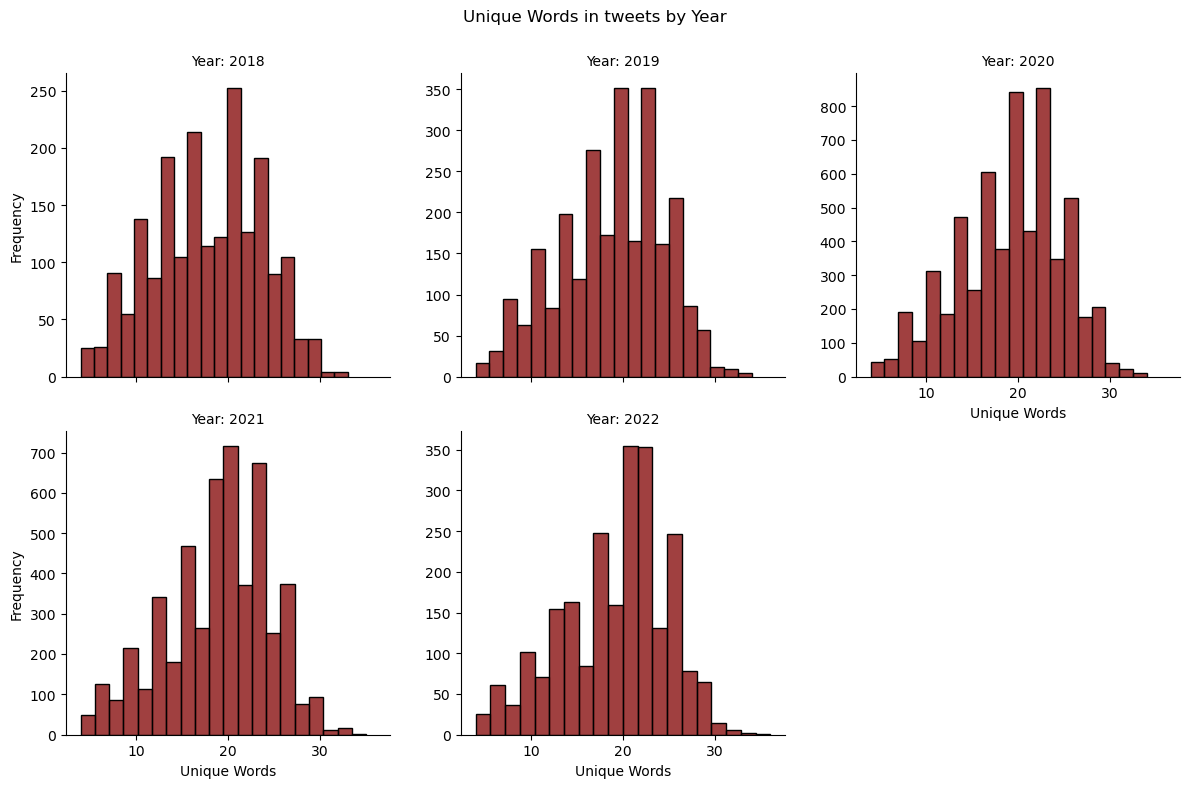

In [28]:
g = sns.FacetGrid(tweets_df, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'unique_word_count', bins=20, color='maroon')

g.set_axis_labels('Unique Words', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Unique Words in tweets by Year')

plt.show()

In [29]:
# mean_word_length
tweets_df['mean_word_length'] = tweets_df['tweet'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

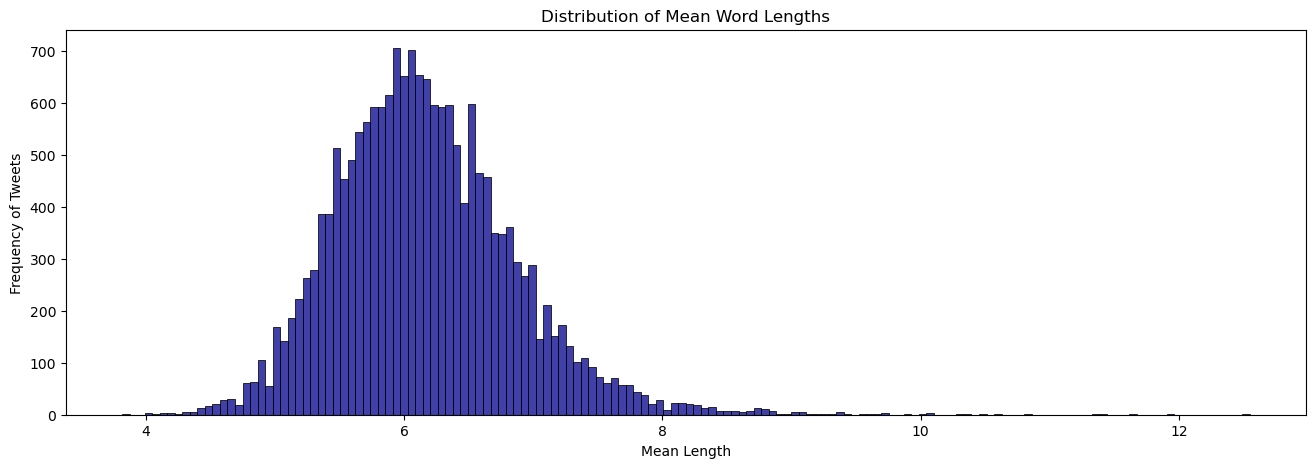

In [30]:
sns.histplot(tweets_df['mean_word_length'], bins=150, color='darkblue')
plt.title('Distribution of Mean Word Lengths')
plt.xlabel('Mean Length')
plt.ylabel('Frequency of Tweets')
plt.show()

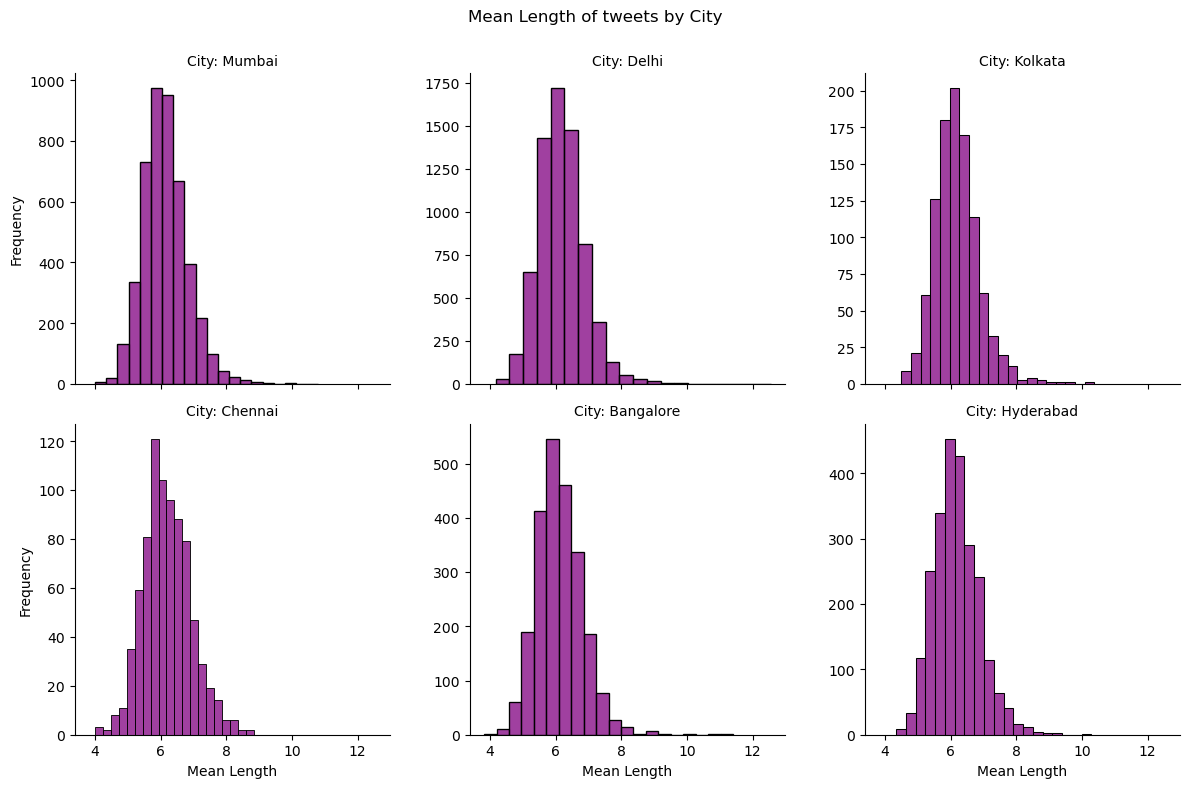

In [31]:
g = sns.FacetGrid(tweets_df, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'mean_word_length', bins=20, color='purple')

g.set_axis_labels('Mean Length', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Length of tweets by City')

plt.show()

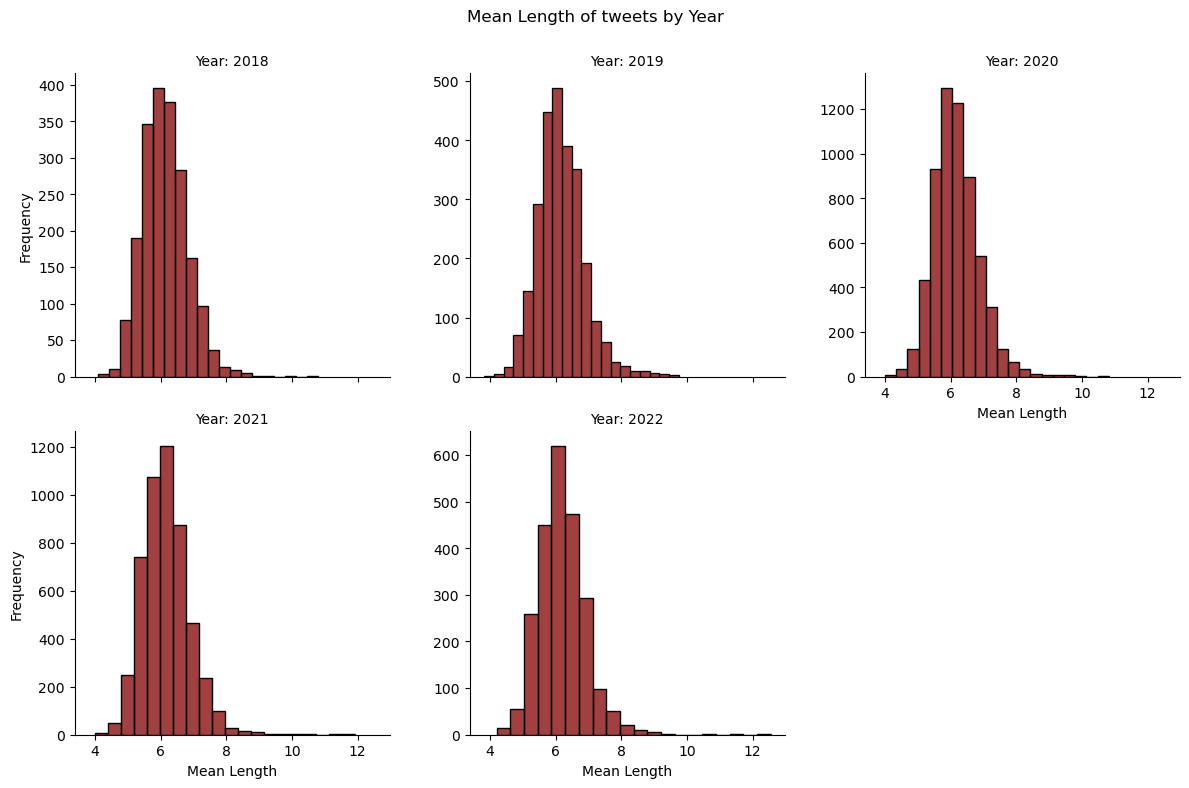

In [32]:
g = sns.FacetGrid(tweets_df, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'mean_word_length', bins=20, color='maroon')

g.set_axis_labels('Mean Length', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Length of tweets by Year')

plt.show()

In [33]:
# stopwords count
tweets_df_uncleaned['stopword_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

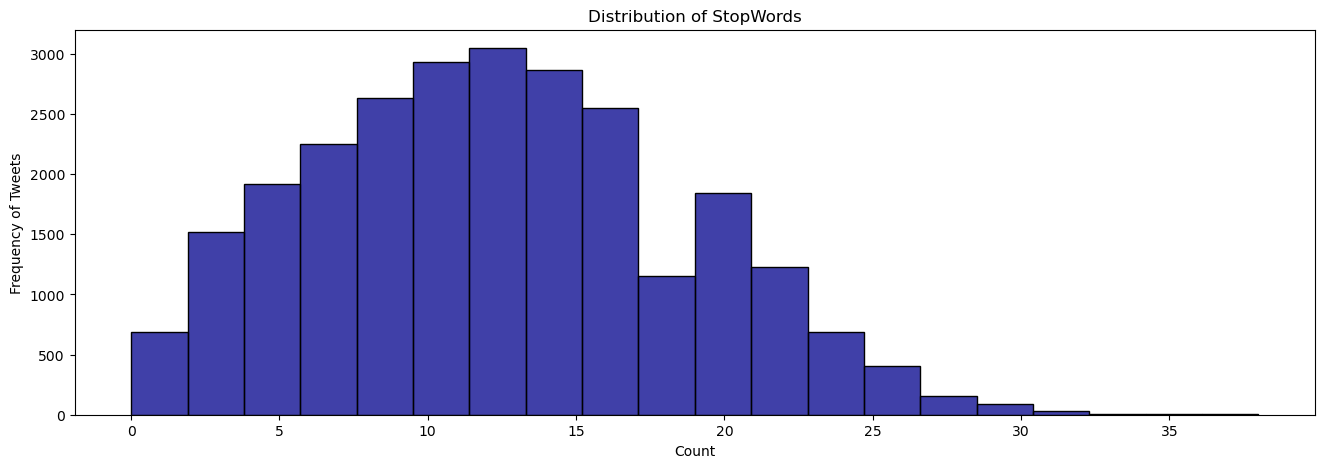

In [35]:
sns.histplot(tweets_df_uncleaned['stopword_count'], bins=20, color='darkblue')
plt.title('Distribution of StopWords')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

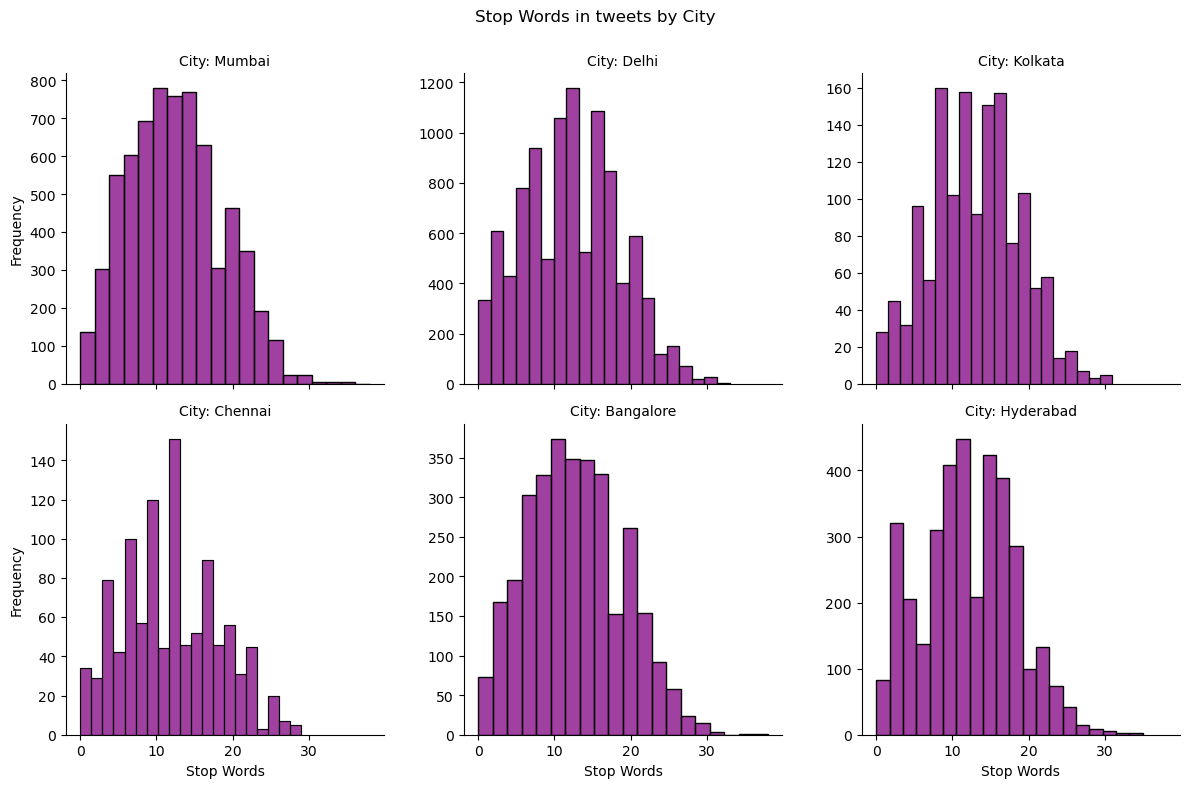

In [36]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'stopword_count', bins=20, color='purple')

g.set_axis_labels('Stop Words', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Stop Words in tweets by City')

plt.show()

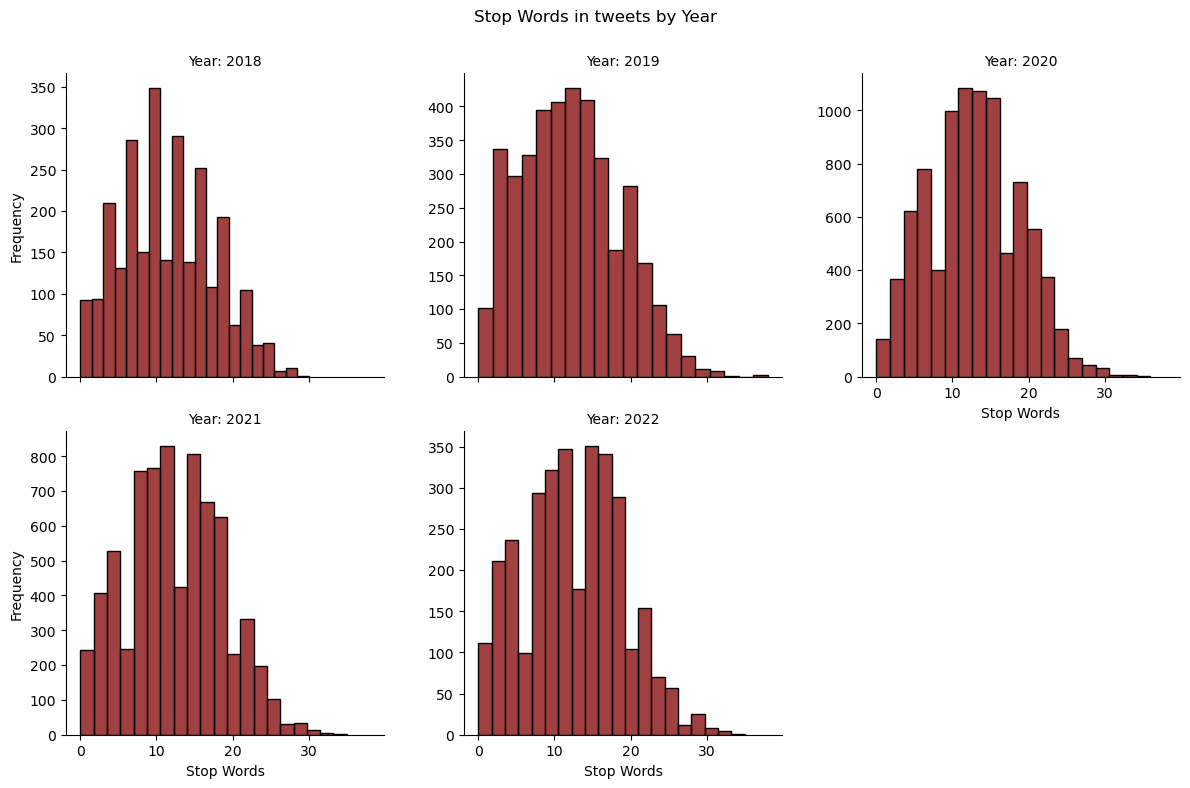

In [37]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'stopword_count', bins=20, color='maroon')

g.set_axis_labels('Stop Words', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Stop Words in tweets by Year')

plt.show()

In [38]:
# url_count
tweets_df_uncleaned['url_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

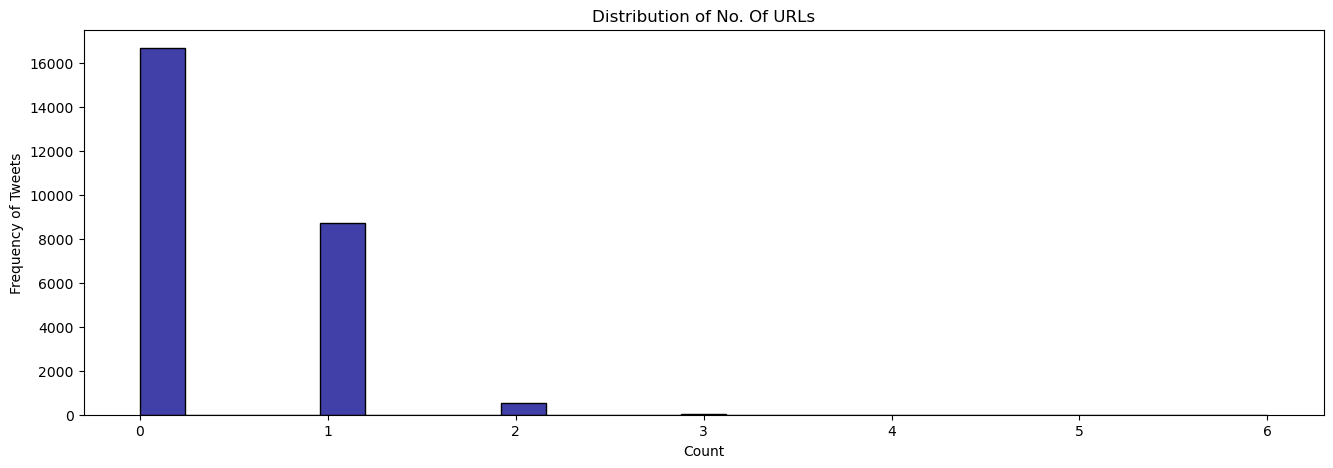

In [39]:
sns.histplot(tweets_df_uncleaned['url_count'], bins=25, color='darkblue')
plt.title('Distribution of No. Of URLs')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

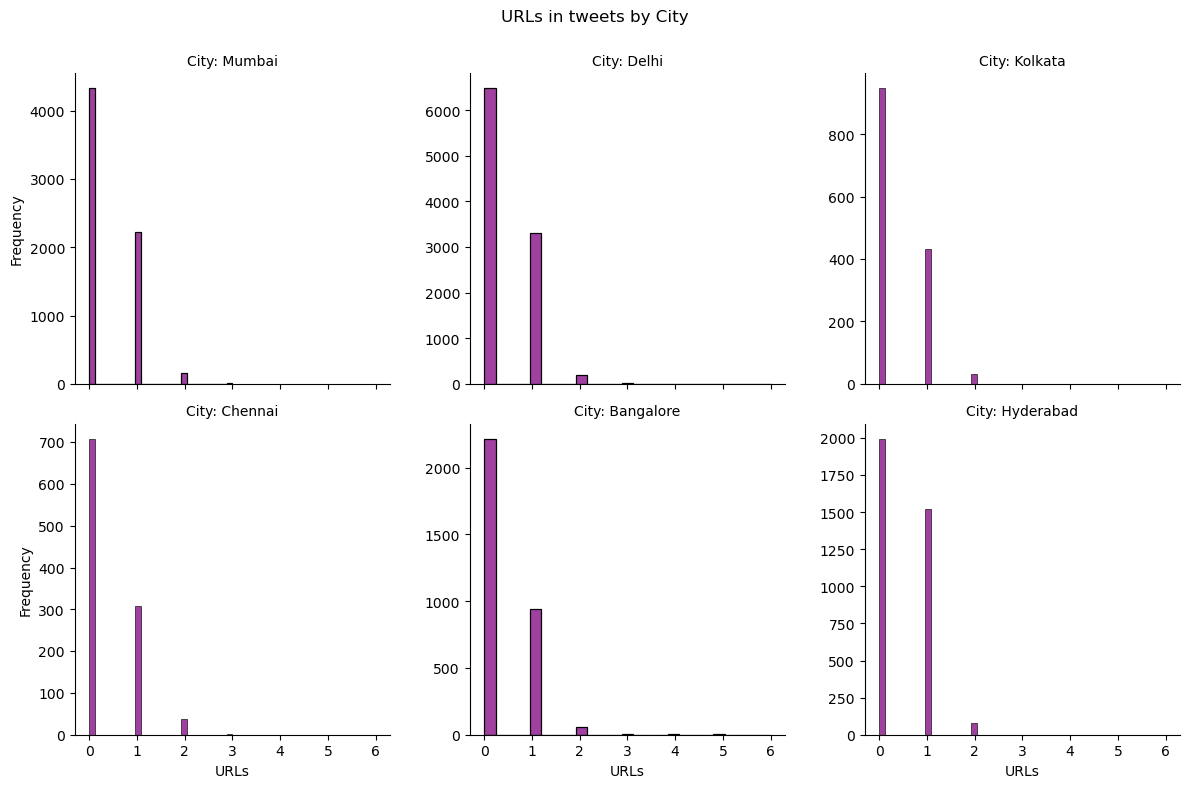

In [40]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'url_count', bins=25, color='purple')

g.set_axis_labels('URLs', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('URLs in tweets by City')

plt.show()

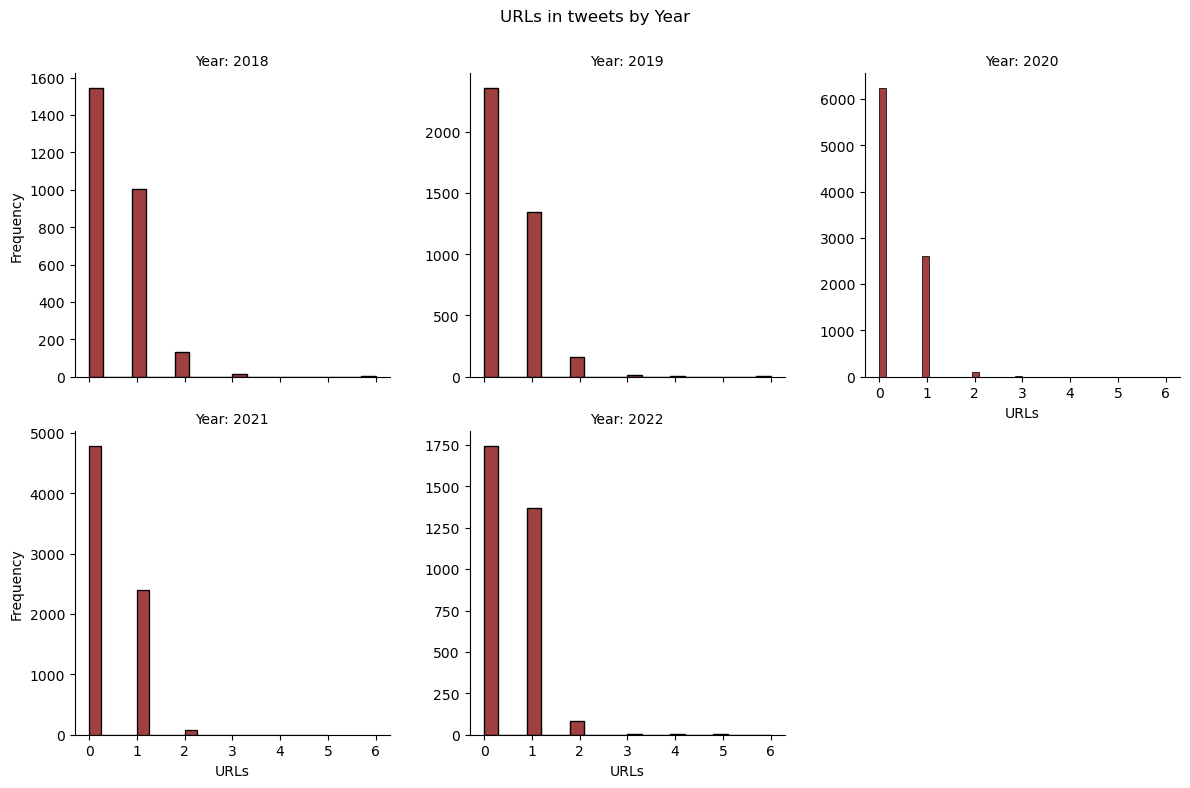

In [41]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'url_count', bins=20, color='maroon')

g.set_axis_labels('URLs', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('URLs in tweets by Year')

plt.show()

In [42]:
# punctuation_count
tweets_df_uncleaned['punctuation_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

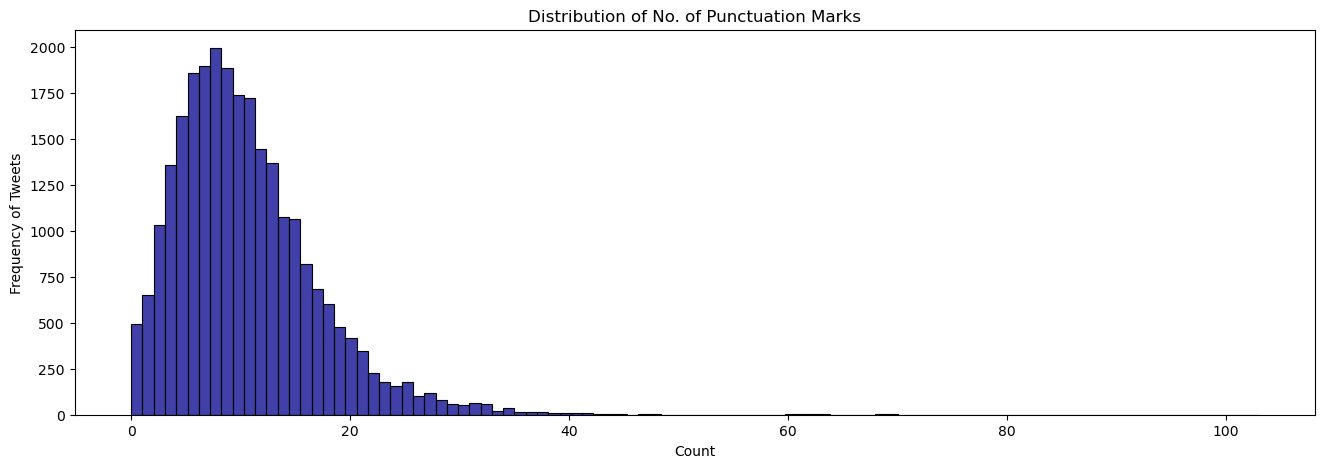

In [43]:
sns.histplot(tweets_df_uncleaned['punctuation_count'], bins=100, color='darkblue')
plt.title('Distribution of No. of Punctuation Marks')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

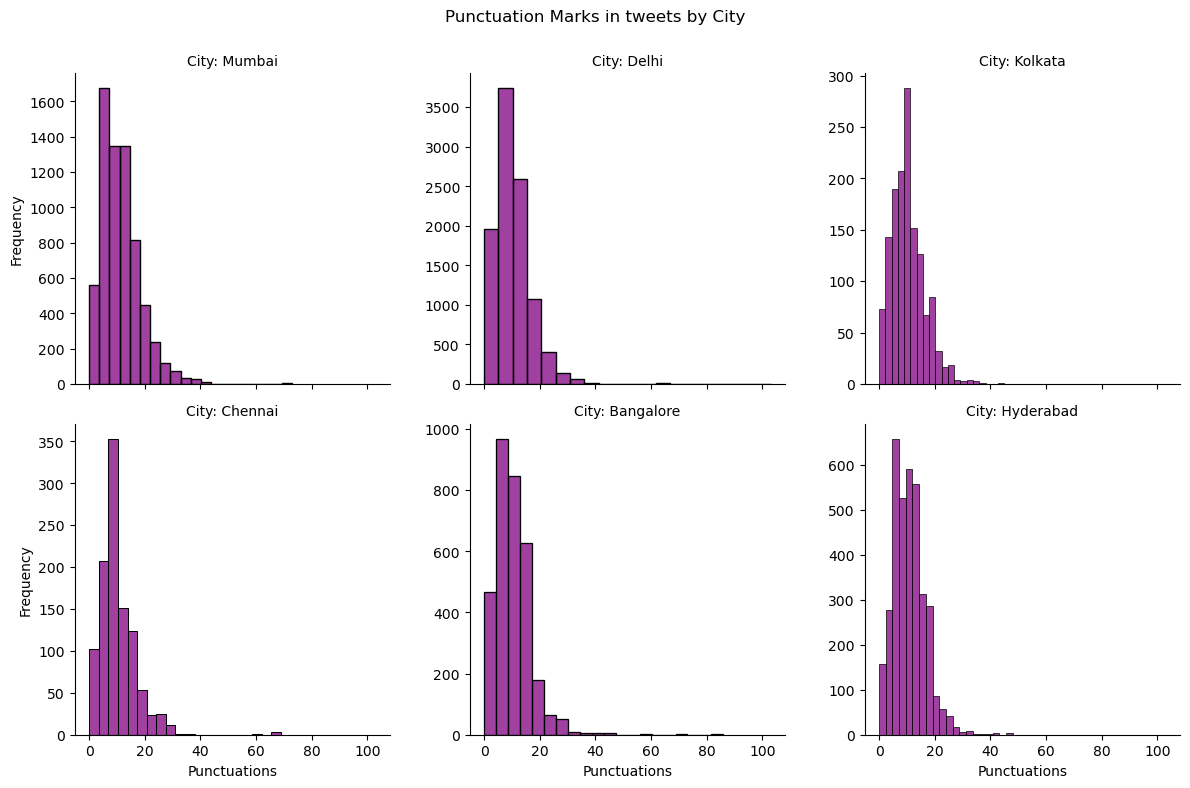

In [44]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'punctuation_count', bins=20, color='purple')

g.set_axis_labels('Punctuations', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Punctuation Marks in tweets by City')

plt.show()

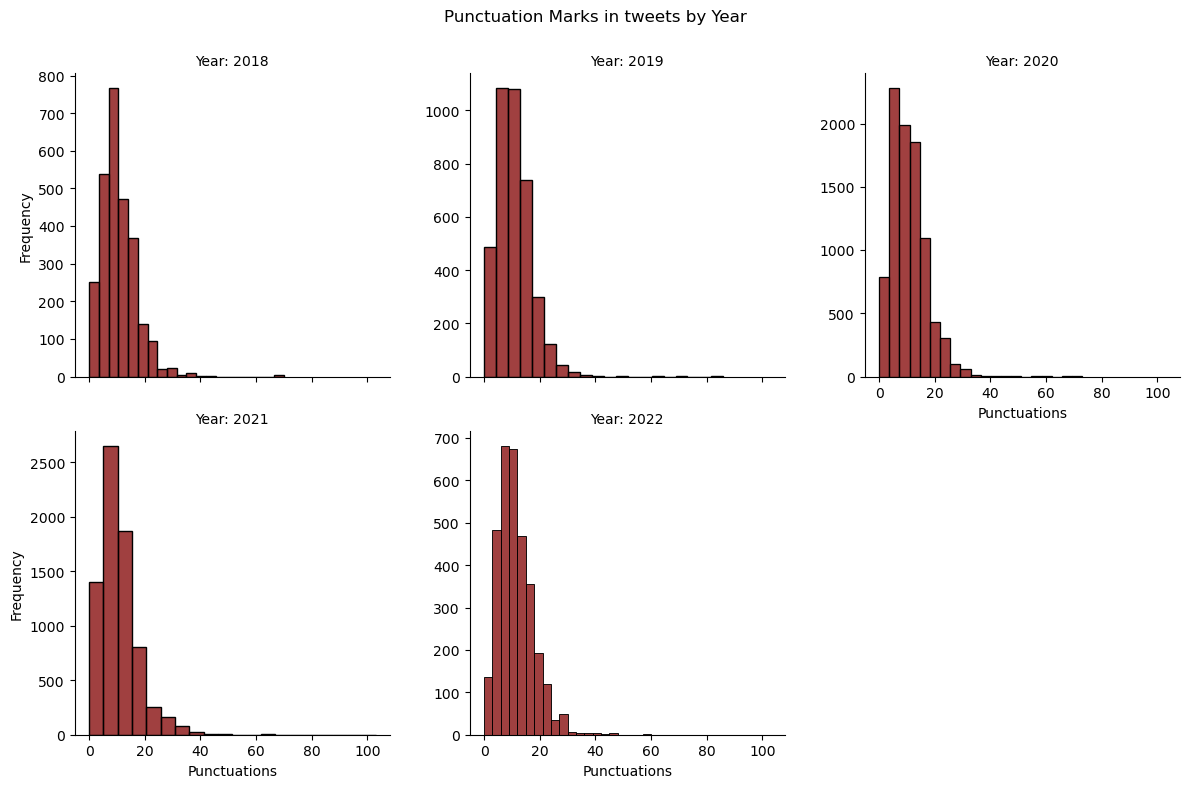

In [45]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'punctuation_count', bins=20, color='maroon')

g.set_axis_labels('Punctuations', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Punctuation Marks in tweets by Year')

plt.show()

In [46]:
# hashtag_count
tweets_df_uncleaned['hashtag_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([c for c in str(x) if c == '#']))

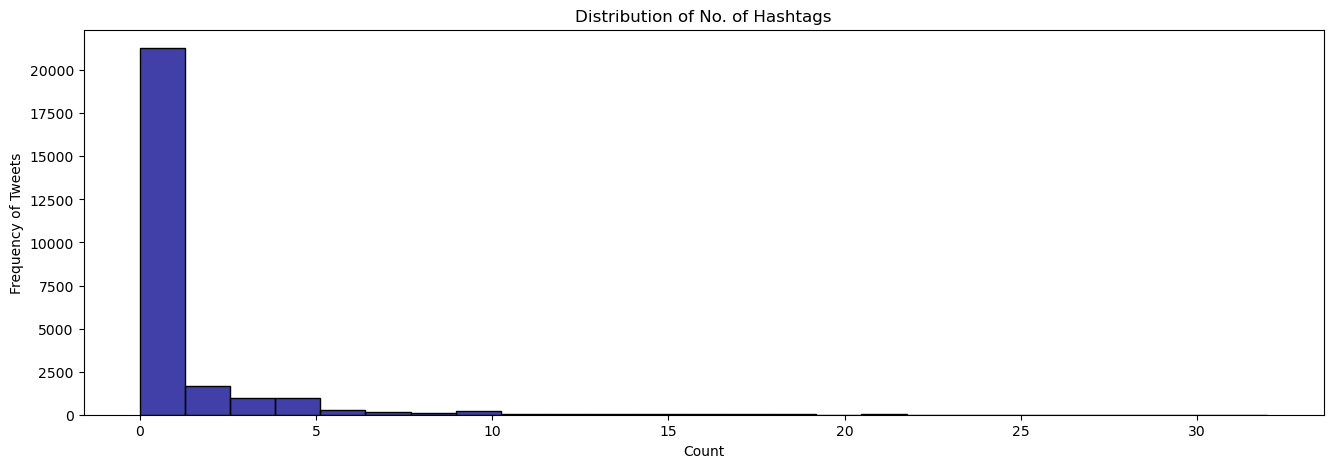

In [47]:
sns.histplot(tweets_df_uncleaned['hashtag_count'], bins=25, color='darkblue')
plt.title('Distribution of No. of Hashtags')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

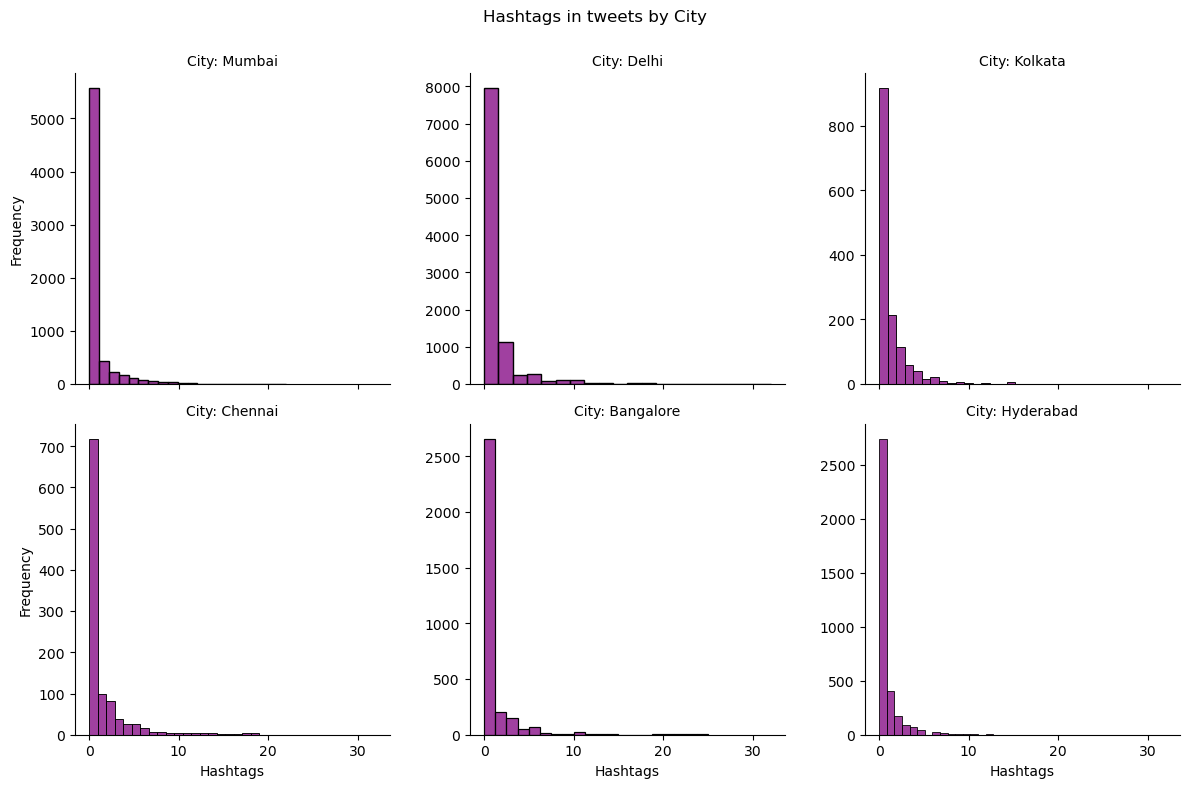

In [48]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'hashtag_count', bins=20, color='purple')

g.set_axis_labels('Hashtags', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Hashtags in tweets by City')

plt.show()

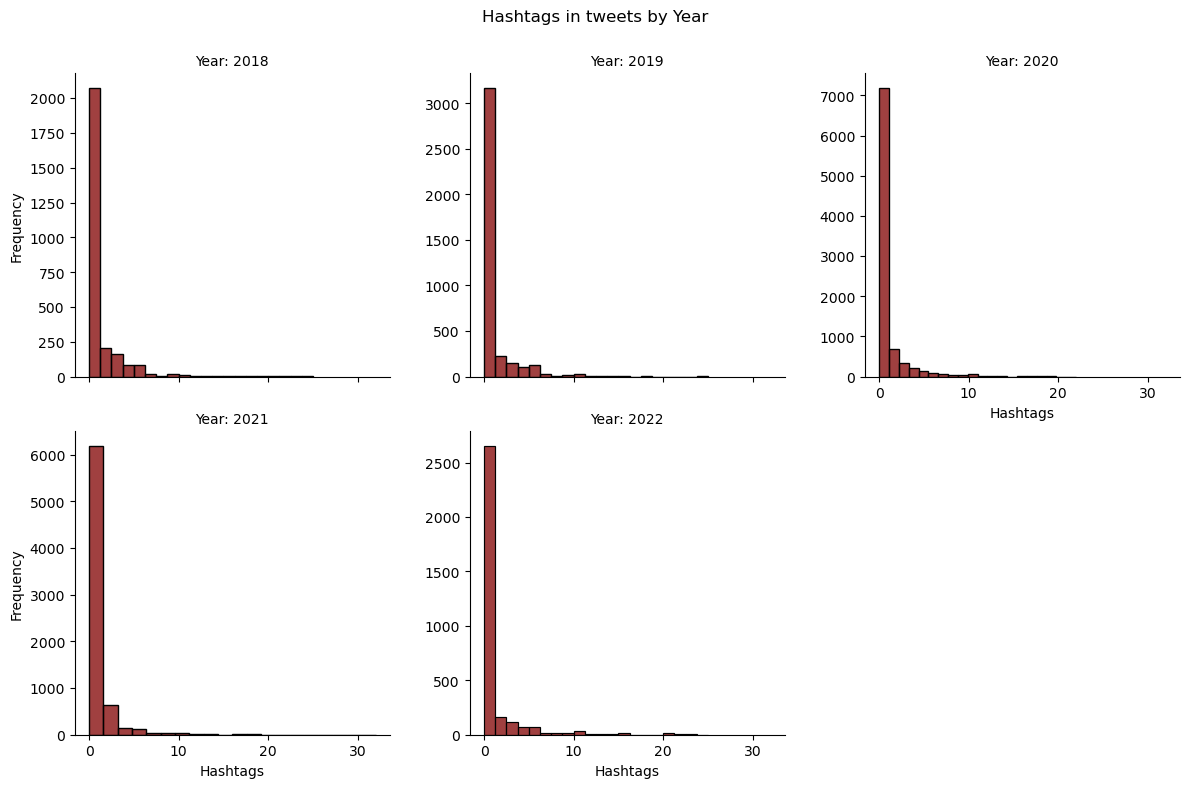

In [49]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'hashtag_count', bins=20, color='maroon')

g.set_axis_labels('Hashtags', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Hashtags in tweets by Year')

plt.show()

In [50]:
# mention_count
tweets_df_uncleaned['mention_count'] = tweets_df_uncleaned['tweet'].apply(lambda x: len([c for c in str(x) if c == '@']))

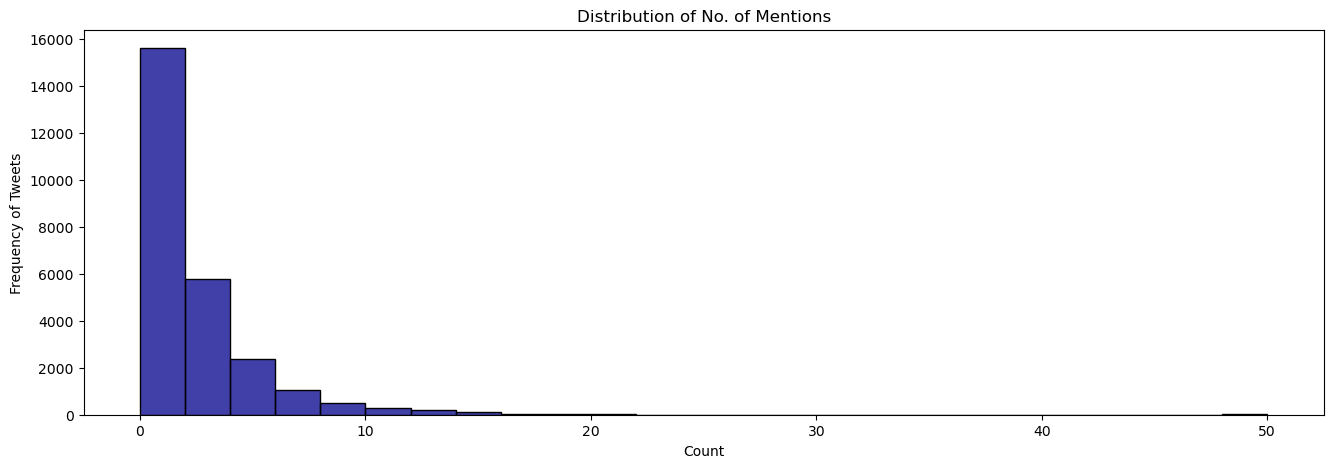

In [51]:
sns.histplot(tweets_df_uncleaned['mention_count'], bins=25, color='darkblue')
plt.title('Distribution of No. of Mentions')
plt.xlabel('Count')
plt.ylabel('Frequency of Tweets')
plt.show()

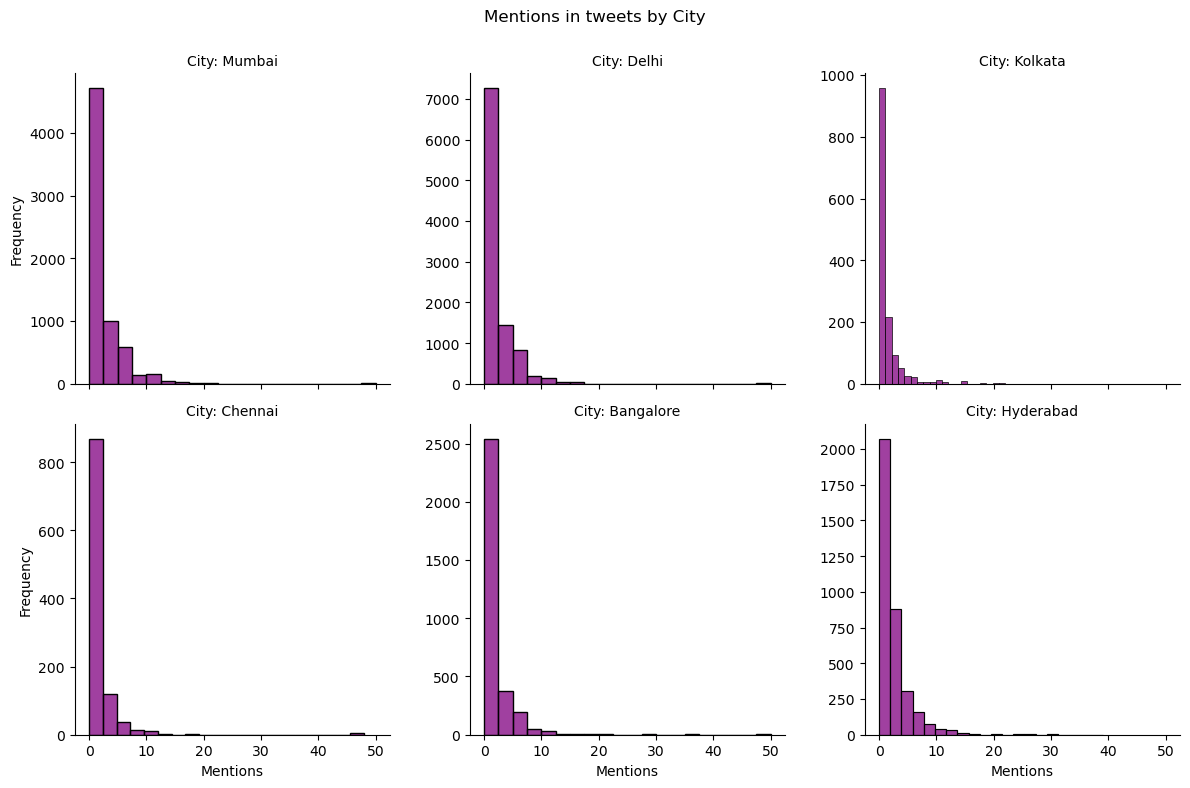

In [52]:
g = sns.FacetGrid(tweets_df_uncleaned, col='city', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'mention_count', bins=20, color='purple')

g.set_axis_labels('Mentions', 'Frequency')
g.set_titles('City: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mentions in tweets by City')

plt.show()

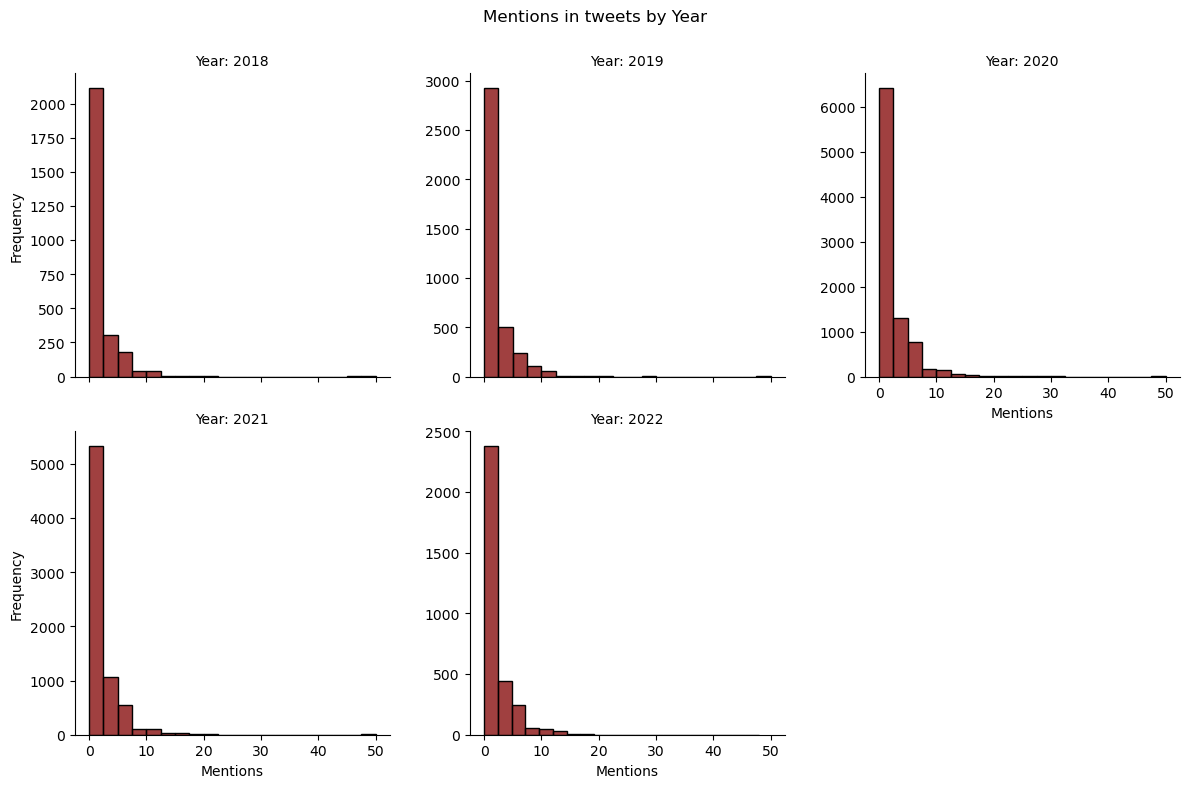

In [53]:
g = sns.FacetGrid(tweets_df_uncleaned, col='year', col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, 'mention_count', bins=20, color='maroon')

g.set_axis_labels('Mentions', 'Frequency')
g.set_titles('Year: {col_name}')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Mentions in tweets by Year')

plt.show()